<a href="https://colab.research.google.com/github/Nitisha-N/DS-PY-SM/blob/main/Mobiles_DataSet_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis using Python**
Today, we will perform EDA on the dataset **mobiles.csv.**
This dataset contains information about models of different mobiles, and by studying all the specifications, this data can be used for market analysis and enhanced user experience.

## 1. Importing libraries.
We import core Python libraries used in Data Science.
- **NumPy**: Numerical operations
- **Pandas**: Data manipulation using DataFrames
- **Matplotlib & Seaborn**: Data visualization

In [105]:
# Firstly, we import all the necessary libraries for EDA using alias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset

The dataset is read from a CSV file into a Pandas DataFrame.
A DataFrame allows series (column-wise) operations.

In [106]:
# read the csv file.
df = pd.read_csv("/content/mobiles.csv")

## 3. Inspecting the Data

We inspect the first few rows and the structure of the dataset.
This helps identify:
- Column names
- Dataset size
- Data types
- Possible null

In [107]:
# Now we show all columns and first 5 rows of the dataset. using df.head()
df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [108]:
#Now we check all the columns present in our dataset along with their datatype.
df.columns


Index(['battery', 'camera', 'display', 'memory', 'name', 'price', 'processor',
       'rating', 'reviews', 'warranty'],
      dtype='object')

We then understand what type of data is included in each of the column.
###There are namely 10 columns:
battery,	camera,	display,	memory,	name,	price,	processor,	rating,	reviews and	warranty.
- battery: battery capacity of the mobile phone
- camera: camera specs of front and rear camera
- display: scren size and display resolution
- memory: RAM and internal storage
- name: full name of model and its variant
- price: the price of the given variant
- processor: processor/chipset used in the mobile phone
- rating: Average user rating given by user (out of 5)
- reviews: total reviews recieved by the phone
- warranty: warranty period for each mobile device
- brand: brand or manufacturer of the phone


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


Now we check the shape of our dataset. This helps us in understanding the total number of  rows and columns we have to deal with.

In [110]:
df.shape


(984, 10)

## 4. Checking Null / Missing Values
Here we understand that we have 984 rows and 10 columns in our dataset.
Now, we will observe all columns, their datatype and possible null values.
- Here we create a function to handle '0' in our dataset.
- This function makes sure that, if value of any element is '0', it is considered as null value.
- Output: Zeros in our dataset are converted to null, and can be dealt with later while handling null values.

In [111]:
cols_zero_invalid = [
    'battery', 'camera', 'display', 'memory', 'name', 'price', 'processor',
       'rating', 'reviews', 'warranty']

df[cols_zero_invalid] = df[cols_zero_invalid].replace(0, np.nan)


Now we check the missing values in our dataset, this ensures that data used to train is complete and reliable.

In [112]:
df.isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,1
rating,13
reviews,13
warranty,148


In [113]:
df.isnull().sum().sum()

np.int64(175)

Now we calculate the percentage of missing values in each column.

In [114]:
df.isnull().sum()/df.shape[0]*100


,0
battery,0.000000
camera,0.000000
display,0.000000
memory,0.000000
name,0.000000
price,0.000000
processor,0.101626
rating,1.321138
reviews,1.321138
warranty,15.040650


## 5. Handling Missing Numerical Values

For numerical columns such as warranty and rating we can use mean, median and mode to fill the null / missing values.

## 6. Handling Missing Categorical Values

For categorical data, mode (most frequent value) is used since mean/median are not applicable.
As warranty column is required for overall analysis we fill the null values.


We use method mode to fill out the missing values in our dataset.
- mode()[0], [0] is used to select a particular series in the dataframe, in this case; "warranty".
- We choose not to delete these columns as they are important for any mobile device.


In [115]:
df["warranty"] = df["warranty"].fillna(df["warranty"].mode()[0])

In [116]:
df["rating"] = df["rating"].fillna(df["rating"].median())

In [117]:
df["reviews"] = df["reviews"].fillna(method="ffill")

/tmp/ipython-input-1290694198.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["reviews"] = df["reviews"].fillna(method="ffill")


In [118]:
df["processor"] = df["processor"].fillna(method="bfill")

/tmp/ipython-input-3784019453.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["processor"] = df["processor"].fillna(method="bfill")


In [119]:
df.isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,0
rating,0
reviews,0
warranty,0


## 7. Statistical Insights
Now, we will study the statistical data such as mean, median and the skewness of the data.
This is crucial for knowing the outliers within a dataset which further manipulates the decisions taken by the machine while using dataset for training in ML.
- We use df.describe() to understand the outliers by studying the boundary i.e minimum and maximum threshold of data distributed.
- df.describe() only works for numeric values


In [120]:
df.describe()

,price,rating
count,984.000000,984.000000
mean,15429.848577,4.241972
std,12891.355967,0.298379
min,887.000000,2.700000
25%,7499.000000,4.100000
50%,11649.000000,4.300000
75%,17999.250000,4.400000
max,104999.000000,4.900000


we use include='all' as this gives us all columns irrespective of their datatype.

In [121]:
df.describe(include="all")

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
count,984,984,984,984,984,984.000000,984,984.000000,984,984
unique,177,185,125,89,878,NaN,287,NaN,386,92
top,4000 mAh Battery,13MP Rear Camera | 5MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",NaN,Qualcomm Snapdragon 730G Processor,NaN,1 Reviews,Brand Warranty of 1 Year Available for Mobile ...
freq,113,53,56,88,4,NaN,21,NaN,10,471
mean,NaN,NaN,NaN,NaN,NaN,15429.848577,NaN,4.241972,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,12891.355967,NaN,0.298379,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,887.000000,NaN,2.700000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7499.000000,NaN,4.100000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,11649.000000,NaN,4.300000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,17999.250000,NaN,4.400000,NaN,NaN


## 8. Outlier Detection
- Detecting Outliers.
- Describe the data visually using box.plot and histograms.
- This is done to check data integrity so that the data used for training is not in any way biased.

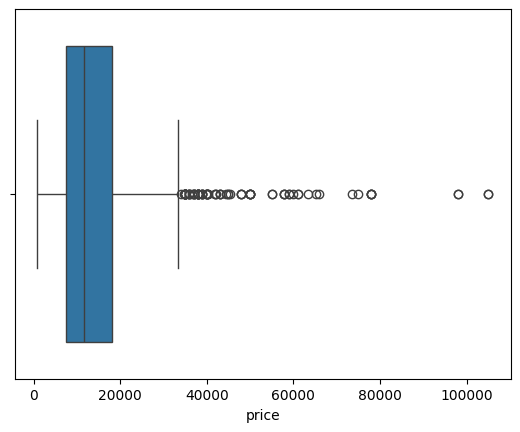

In [122]:
# boxplot creation for outlier description
sns.boxplot(x=df["price"])
plt.show()

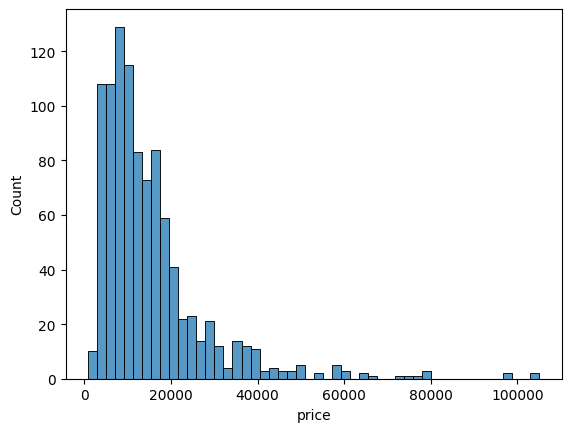

In [123]:
sns.histplot(df["price"])
plt.show()

### bins = 30 splits x-axis into 30 intervals (bins), more the bins better the details.

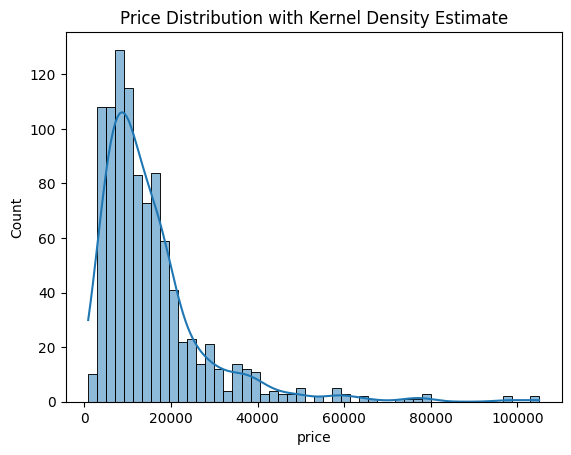

In [124]:
sns.histplot(
    df['price'],
    kde=True
)
plt.title('Price Distribution with Kernel Density Estimate')
plt.show()


### Here, we understand that prices above 45,000 for our mobiles are outliers.
The price distribution is right-skewed, with most mobile phones priced in the budget to mid-range segment.
Because a few very expensive phones exist, the average price can be misleading, so the middle value (median) gives a better idea of typical prices.
As the range of most of the mobile phones is more than 8000 and less than 60000, we will remove all the outliers i.e the the values lying outside the "range."

Code to remove outliers and get a cleaned dataset.


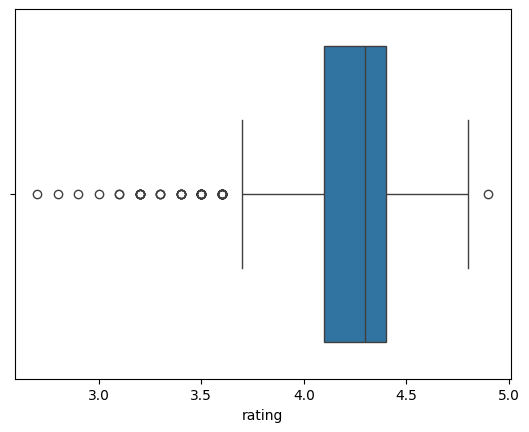

In [125]:
#Now we check the outliers, for the rating column
sns.boxplot(x=df["rating"])
plt.show()

### Here, we can see that most of the ratings lie between 4 to 4.5.
We understand that the mobile models in our dataset are highly regarded and are liked by customers.

#### Now we remove outliers to clean the data, and make it ready for ML operations.
- we will apply IQR for this. (Interquartile Range)
- IQR = Q3 - Q1
where Q1 is first quartile i.e 25th percentile
where Q3 is the third quartile i.e 75th percentile

when we use quantile(0.25) it gives us all the observations lying below 25% of all prices
and quantile(0.75) gives the values below 75%.
the range between these two is the IQR i.e Middle.

In [126]:
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

Now we apply the new values on our dataset.
& is used to make sure that ALL the conditions are true at the same time.

In [127]:
df_clean = df[(df["price"] >= lower_price) & (df["price"] <= upper_price)]

### Finally we again check the data, to ensure that the data is ready for ML Operations

In [128]:
df_clean.head()


,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [129]:
df_clean.tail()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
978,2300 mAh Li-Ion Polymer Battery,8MP Rear Camera | 5MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 16 GB ROM | Expandable Upto 128 GB,"Gionee P5L (Gold, 16 GB)",4290,Quad Core 1.3GHz Processor,3.7,201 Reviews,Brand Warranty of 1 Year
979,2000 mAh Battery,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...
980,2680 mAh Li-Ion Battery,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year
981,4550 mAh Battery,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...
982,2100 mAh Li-Ion Battery,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty


In [130]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 982
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    905 non-null    object 
 1   camera     905 non-null    object 
 2   display    905 non-null    object 
 3   memory     905 non-null    object 
 4   name       905 non-null    object 
 5   price      905 non-null    int64  
 6   processor  905 non-null    object 
 7   rating     905 non-null    float64
 8   reviews    905 non-null    object 
 9   warranty   905 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.8+ KB


rows are removed without being renumbered, so even when we have only 905 valid data and others are removed we still get numbers from 0 to 982 as indexing has not changed.

In [131]:
df_clean.isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,0
rating,0
reviews,0
warranty,0


In [132]:
df_clean.describe()

,price,rating
count,905.000000,905.000000
mean,12481.185635,4.220884
std,6835.168684,0.300397
min,887.000000,2.700000
25%,7150.000000,4.100000
50%,10999.000000,4.300000
75%,16999.000000,4.400000
max,33333.000000,4.900000


In [133]:
print(df['price'].min())

887


In [134]:
print(df_clean['price'].min())

887


In [135]:
print(df['price'].max())

104999


In [136]:
print(df_clean['price'].max())

33333


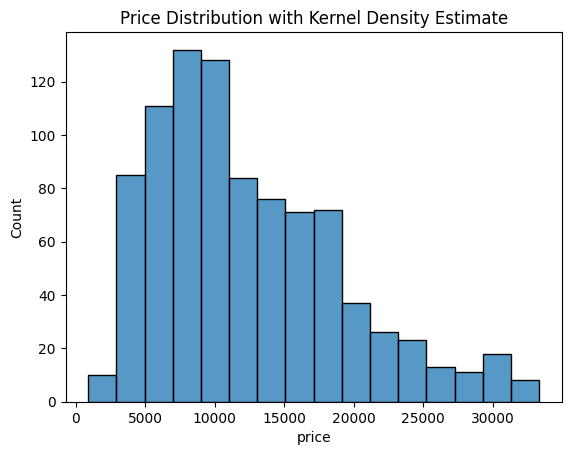

In [137]:
sns.histplot(
    df_clean['price'],
)
plt.title('Price Distribution with Kernel Density Estimate')
plt.show()

now we visualise data with different plots.
we will visualize categorical & numerical columns.

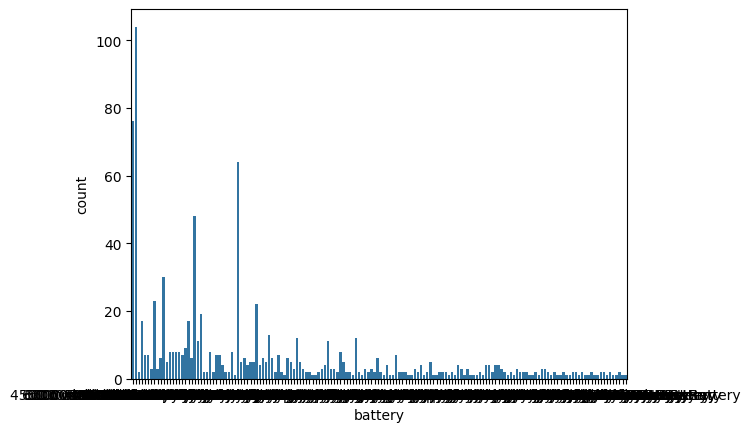

In [138]:
countplot = sns.countplot(x="battery", data=df_clean)

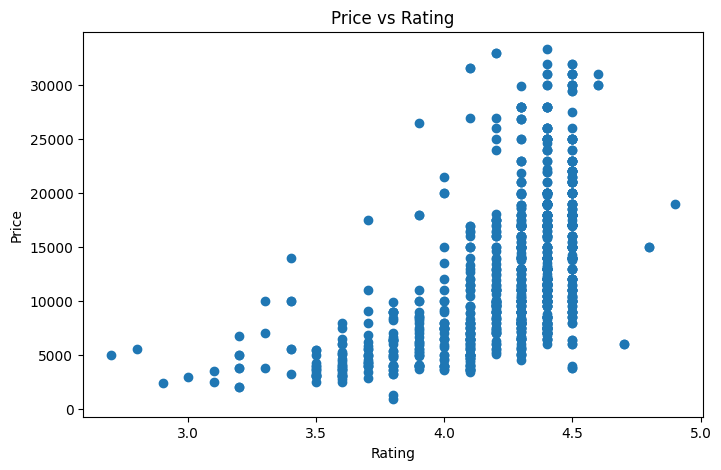

In [139]:
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['rating'], df_clean['price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price vs Rating')
plt.show()


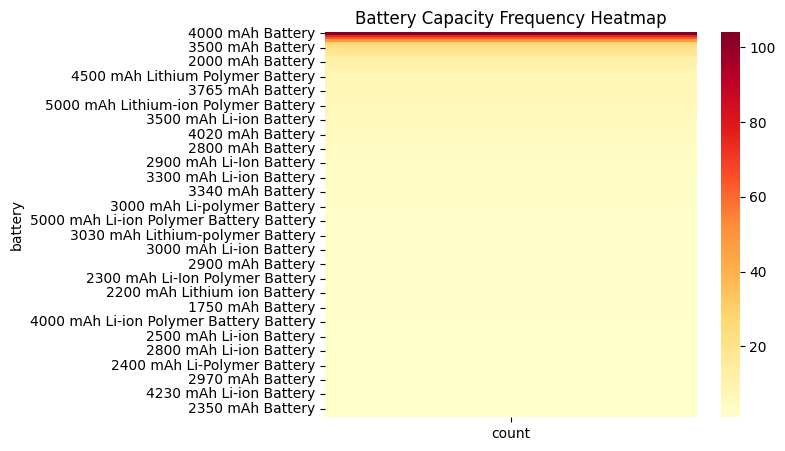

In [140]:
battery_counts = df_clean['battery'].value_counts().to_frame()

plt.figure(figsize=(6, 5))
sns.heatmap(battery_counts, cmap='YlOrRd', cbar=True)
plt.title('Battery Capacity Frequency Heatmap')
plt.show()


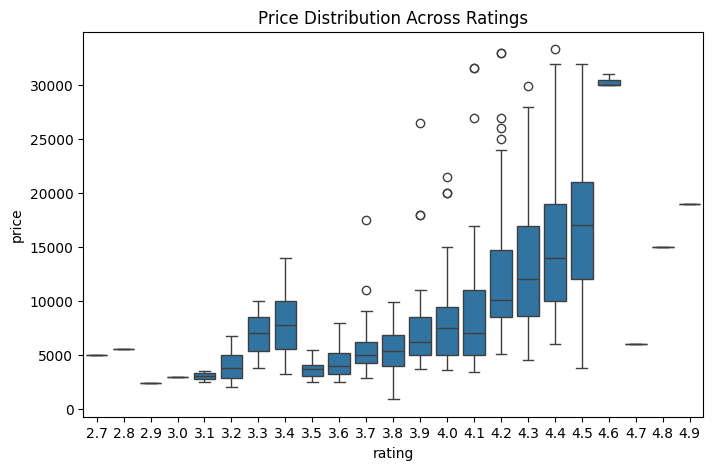

In [141]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='price', data=df_clean)
plt.title('Price Distribution Across Ratings')
plt.show()

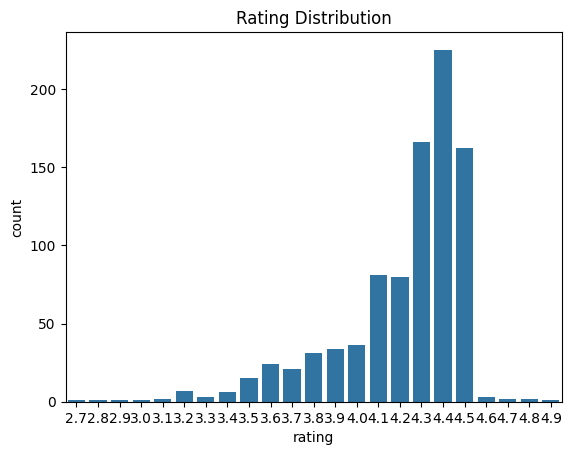

In [142]:
sns.countplot(x='rating', data=df_clean)
plt.title('Rating Distribution')
plt.show()